pirvite socre 0.90256 , leader board상으로 약 420등/983team

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
print(os.getcwd())
# print(os.listdir(os.getcwd()))

D:\notebook\kaggle\facebook_human_or_robot


In [11]:
bids = pd.read_csv(os.getcwd()+'/kaggle/input/facebook-recruiting-iv-human-or-bot/bids.csv.zip')
bids
## 시간정보는 거의 항상 도움된다.

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3
...,...,...,...,...,...,...,...,...,...
7656329,7656329,626159dd6f2228ede002d9f9340f75b7puk8d,3e64w,jewelry,phone91,9709222052631578,ru,140.204.227.63,cghhmomsaxi6pug
7656330,7656330,a318ea333ceee1ba39a494476386136a826dv,xn0y0,mobile,phone236,9709222052631578,pl,24.232.159.118,wgggpdg2gx5pesn
7656331,7656331,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,gja6c,sporting goods,phone80,9709222052631578,za,80.237.28.246,5xgysg14grlersa
7656332,7656332,d4bd412590f5106b9d887a43c51b254eldo4f,hmwk8,jewelry,phone349,9709222052631578,my,91.162.27.152,bhtrek44bzi2wfl


In [12]:
time_diff = bids.groupby('bidder_id')['time'].apply(lambda x : (x.max()-x.min())/x.count()).reset_index() ## x는 series이다. series에 쓰이는 함수를 apply 안에서 쓰는것임.
time_diff
## time이 0인건 하나만 구매했거나 여러개구매를 단번에 한것(로봇)

,bidder_id,time
0,001068c415025a009fee375a12cff4fcnht8y,0.000000e+00
1,002d229ffb247009810828f648afc2ef593rb,5.263158e+07
2,0030a2dd87ad2733e0873062e4f83954mkj86,0.000000e+00
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,2.198523e+13
4,00486a11dff552c4bd7696265724ff81yeo9v,3.817492e+12
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,5.439912e+08
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,3.432876e+12
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,0.000000e+00
6612,ffd62646d600b759a985d45918bd6f0431vmz,2.051855e+10


In [13]:
# auction_nunique = bids.groupby('bidder_id')['auction'].nunique().to_frame('auction_nunique').reset_index()
# auction_nunique
nunique = bids.groupby('bidder_id')[['auction', 'device','country']].nunique().reset_index()
nunique

,bidder_id,auction,device,country
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1
1,002d229ffb247009810828f648afc2ef593rb,1,2,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3,3,1
4,00486a11dff552c4bd7696265724ff81yeo9v,13,8,1
...,...,...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,637,792,102
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,15,13,6
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1,1,1
6612,ffd62646d600b759a985d45918bd6f0431vmz,55,96,1


In [ ]:
## url은 패턴차이가 별로없음
## ip는 정보가 많이 겹처서 안해도 됨.

In [14]:
## 구매횟수가 큰 아이디는 로봇일 확률이 높다.
id_count = bids.groupby('bidder_id')['bid_id'].count().to_frame('id_count').reset_index()
id_count
## id 개수가 6614개로 더 적다. 구매를 안한 아이디도 있는 것임. 구매이력이 없음.

,bidder_id,id_count
0,001068c415025a009fee375a12cff4fcnht8y,1
1,002d229ffb247009810828f648afc2ef593rb,2
2,0030a2dd87ad2733e0873062e4f83954mkj86,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3
4,00486a11dff552c4bd7696265724ff81yeo9v,20
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,25075
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,22
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1
6612,ffd62646d600b759a985d45918bd6f0431vmz,664


In [ ]:
# merchan_count = bids.groupby('bidder_id')['merchandise'].count().to_frame('merchan_count').reset_index()
# merchan_count ## id_count랑 중복되는 정보임.

In [ ]:
# merchan_count_unique = bids.groupby('bidder_id')['merchandise'].nunique().to_frame('merchan_count_unique').reset_index()
# merchan_count_unique.sort_values(ascending=True, by='merchan_count_unique') ## 별 차이 없음. 전부 개수가 1 혹은 2임.

In [ ]:
# ip_count = bids.groupby('bidder_id')['ip'].count().to_frame('merchan_count').reset_index()
# ip_count ## 이것도 중복되는 정보

In [ ]:
# ip_nunique = bids.groupby('bidder_id')['ip'].nunique().to_frame('ip_nunique').reset_index()
# ip_nunique ## 

In [ ]:
# device_nunique = bids.groupby('bidder_id')['device'].nunique().to_frame('device_nunique').reset_index()
# device_nunique

In [15]:
train = pd.read_csv(os.getcwd()+'/kaggle/input/facebook-recruiting-iv-human-or-bot/train.csv.zip')
train

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0
...,...,...,...,...
2008,369515b3af4f8ca582f90271d30b14b6r52aw,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,0.0
2009,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0.0
2010,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0
2011,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0


In [16]:
test = pd.read_csv(os.getcwd()+'/kaggle/input/facebook-recruiting-iv-human-or-bot/test.csv.zip')
test

,bidder_id,payment_account,address
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa
...,...,...,...
4695,bef56983ba78b2ee064443ae95972877jfkyd,0f235a6dfea5a5885d63968826b748b4q4dra,a98a4841db165de919d29cb49d0bc306cq21h
4696,4da45cc915c32d4368ac7e773d92d4affwqrr,9e0adf7481c422654d4d0a849e0e50abiumen,e23d9777cddc347de82d839b2e54b22ecopkp
4697,0d0e6220bf59ab9a0c5b5987fb2c34a9p33f9,7df4ebd184668b4257f740b11d4519afq7kr1,b650404e1ab5d177020221277c3e9306qegyl
4698,4981c32c54dde65b79dbc48fd9ab6457caqze,a3d2de7675556553a5f08e4c88d2c2284qlm0,9c35320088eaf32046a51a96ebb2e658i479u


In [17]:
train['outcome'].value_counts() ## 1이 별로 없다.

0.0    1910
1.0     103
Name: outcome, dtype: int64

In [18]:
## train과 test에서 bidder_id는 겹치는게 없다(당연히). 그러므로 빼준다.
all_data=pd.concat([train,test])
all_data['bidder_id'].nunique()

6713

In [19]:
all_data.nunique()

bidder_id          6713
payment_account    6713
address            6713
outcome               2
dtype: int64

In [20]:
all_data = pd.merge(all_data, nunique, on='bidder_id', how='left')
all_data

,bidder_id,payment_account,address,outcome,auction,device,country
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,18.0,14.0,6.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,1.0,2.0,1.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4.0,2.0,1.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1.0,1.0,1.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,23.0,53.0,2.0
...,...,...,...,...,...,...,...
6708,bef56983ba78b2ee064443ae95972877jfkyd,0f235a6dfea5a5885d63968826b748b4q4dra,a98a4841db165de919d29cb49d0bc306cq21h,NaN,41.0,9.0,5.0
6709,4da45cc915c32d4368ac7e773d92d4affwqrr,9e0adf7481c422654d4d0a849e0e50abiumen,e23d9777cddc347de82d839b2e54b22ecopkp,NaN,32.0,29.0,10.0
6710,0d0e6220bf59ab9a0c5b5987fb2c34a9p33f9,7df4ebd184668b4257f740b11d4519afq7kr1,b650404e1ab5d177020221277c3e9306qegyl,NaN,419.0,376.0,86.0
6711,4981c32c54dde65b79dbc48fd9ab6457caqze,a3d2de7675556553a5f08e4c88d2c2284qlm0,9c35320088eaf32046a51a96ebb2e658i479u,NaN,5.0,4.0,1.0


In [21]:
all_data = pd.merge(all_data, id_count, on='bidder_id', how='left')
all_data

,bidder_id,payment_account,address,outcome,auction,device,country,id_count
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,18.0,14.0,6.0,24.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,1.0,2.0,1.0,3.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4.0,2.0,1.0,4.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1.0,1.0,1.0,1.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,23.0,53.0,2.0,155.0
...,...,...,...,...,...,...,...,...
6708,bef56983ba78b2ee064443ae95972877jfkyd,0f235a6dfea5a5885d63968826b748b4q4dra,a98a4841db165de919d29cb49d0bc306cq21h,NaN,41.0,9.0,5.0,983.0
6709,4da45cc915c32d4368ac7e773d92d4affwqrr,9e0adf7481c422654d4d0a849e0e50abiumen,e23d9777cddc347de82d839b2e54b22ecopkp,NaN,32.0,29.0,10.0,66.0
6710,0d0e6220bf59ab9a0c5b5987fb2c34a9p33f9,7df4ebd184668b4257f740b11d4519afq7kr1,b650404e1ab5d177020221277c3e9306qegyl,NaN,419.0,376.0,86.0,2162.0
6711,4981c32c54dde65b79dbc48fd9ab6457caqze,a3d2de7675556553a5f08e4c88d2c2284qlm0,9c35320088eaf32046a51a96ebb2e658i479u,NaN,5.0,4.0,1.0,5.0


In [22]:
all_data = pd.merge(all_data, time_diff, on='bidder_id', how='left')
all_data

,bidder_id,payment_account,address,outcome,auction,device,country,id_count,time
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,18.0,14.0,6.0,24.0,5.473158e+11
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,1.0,2.0,1.0,3.0,2.155719e+12
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4.0,2.0,1.0,4.0,1.784250e+12
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1.0,1.0,1.0,1.0,0.000000e+00
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,23.0,53.0,2.0,155.0,7.727708e+10
...,...,...,...,...,...,...,...,...,...
6708,bef56983ba78b2ee064443ae95972877jfkyd,0f235a6dfea5a5885d63968826b748b4q4dra,a98a4841db165de919d29cb49d0bc306cq21h,NaN,41.0,9.0,5.0,983.0,6.845291e+10
6709,4da45cc915c32d4368ac7e773d92d4affwqrr,9e0adf7481c422654d4d0a849e0e50abiumen,e23d9777cddc347de82d839b2e54b22ecopkp,NaN,32.0,29.0,10.0,66.0,2.028373e+11
6710,0d0e6220bf59ab9a0c5b5987fb2c34a9p33f9,7df4ebd184668b4257f740b11d4519afq7kr1,b650404e1ab5d177020221277c3e9306qegyl,NaN,419.0,376.0,86.0,2162.0,3.574636e+10
6711,4981c32c54dde65b79dbc48fd9ab6457caqze,a3d2de7675556553a5f08e4c88d2c2284qlm0,9c35320088eaf32046a51a96ebb2e658i479u,NaN,5.0,4.0,1.0,5.0,1.828063e+12


In [23]:
all_data['auction_ratio'] = all_data['auction']/all_data['id_count']
all_data['device_ratio'] = all_data['id_count']/all_data['device']


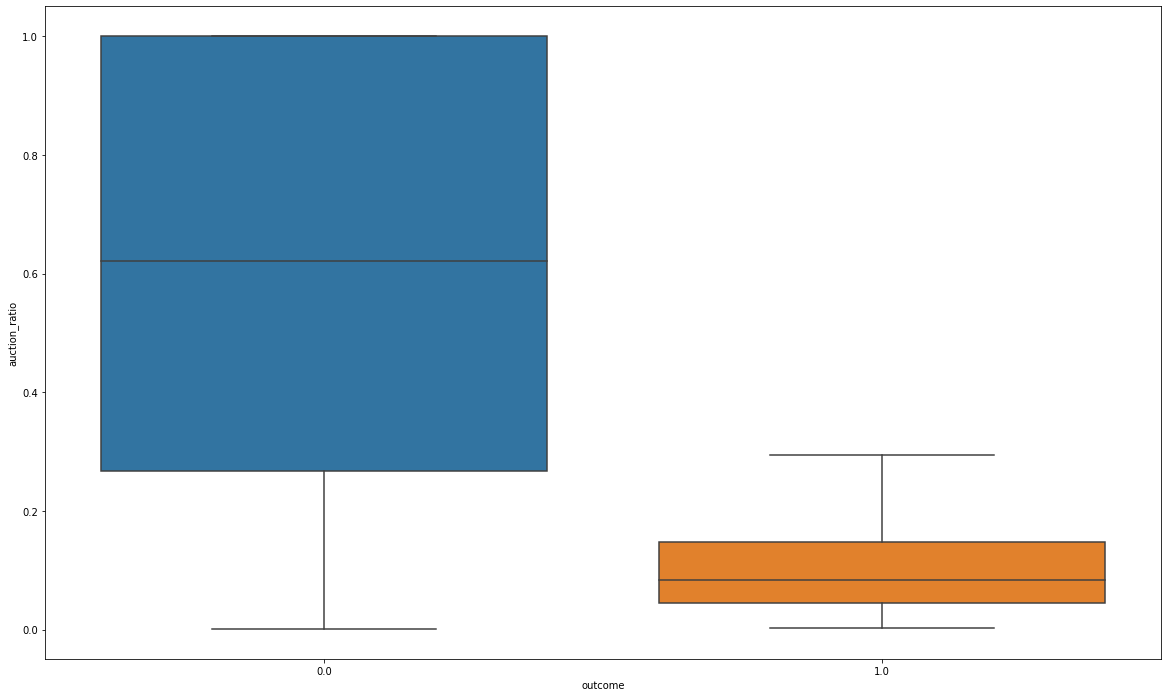

In [24]:
plt.figure(figsize=(20,12))
sns.boxplot(all_data['outcome'], all_data['auction_ratio'], showfliers=False)

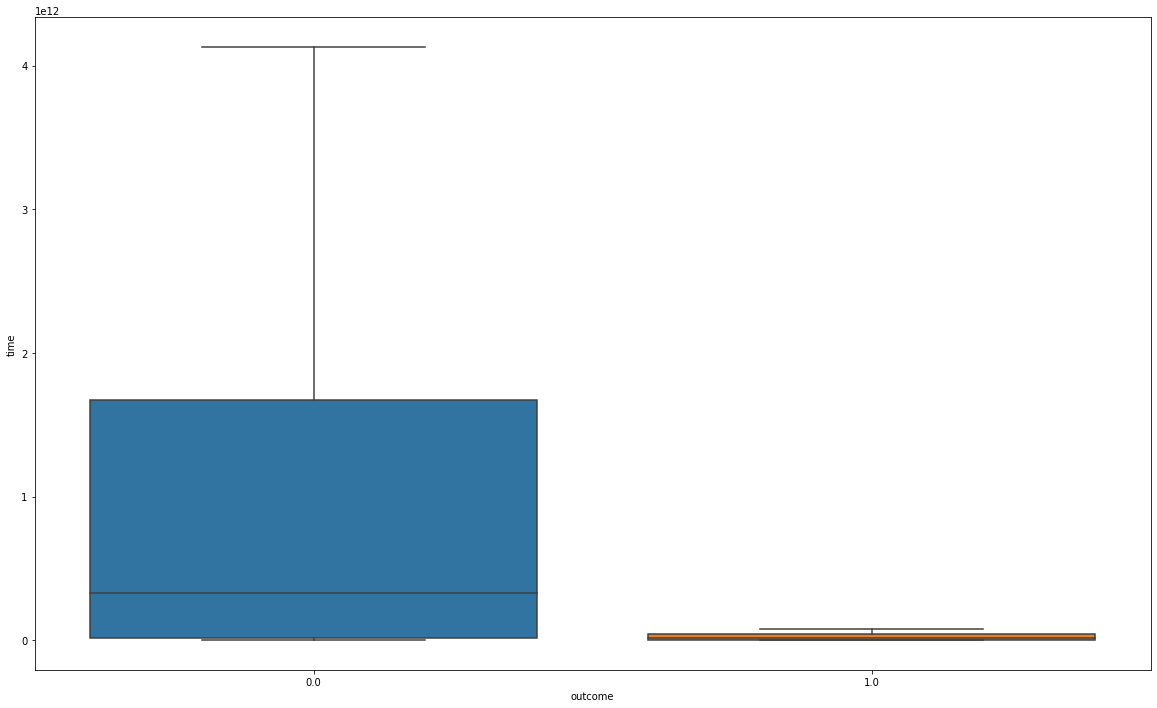

In [25]:
plt.figure(figsize=(20,12))
sns.boxplot(all_data['outcome'], all_data['time'], showfliers=False)

In [ ]:
# all_data = pd.merge(all_data, ip_nunique, on='bidder_id', how='left')
# all_data

In [ ]:
# all_data = pd.merge(all_data, device_nunique, on='bidder_id', how='left')
# all_data

In [ ]:
# plt.figure(figsize=(20,12))
# sns.boxplot(all_data['outcome'], all_data['auction_nunique'], showfliers=False)

In [ ]:


# plt.figure(figsize=(20,12))
# sns.boxplot(all_data['outcome'], all_data['id_count'], showfliers=False) ## 로봇은 구매횟수가 대체로 더 높다.
# ## 사람중에 아웃라이어가 있는데 이걸 지우면 안됨. 이것도 학습할 수 있게 feature를 추가하기. 이건 아웃라이어가 아닐 수 있음. 그냥 업체에서 구매한 것일 수 있음.

In [ ]:
# plt.figure(figsize=(20,12))
# sns.boxplot(all_data['outcome'], all_data['ip_nunique'], showfliers=False)

In [ ]:
# plt.figure(figsize=(20,12))
# sns.boxplot(all_data['outcome'], all_data['device_nunique'], showfliers=False)

In [26]:
## 앞의 5개의 글자만 보기
#all_data['payment_account'].str[:5]
all_data['payment_account'] = all_data['payment_account'].apply(lambda x:x[:5])
all_data['payment_account']

0       a3d2d
1       a3d2d
2       a3d2d
3       51d80
4       a3d2d
        ...  
6708    0f235
6709    9e0ad
6710    7df4e
6711    a3d2d
6712    a3d2d
Name: payment_account, Length: 6713, dtype: object

In [27]:
## 앞의 5개 부분이 겹치는게 있다.
all_data['payment_account'].nunique()

2526

In [28]:
## 정렬해서 보면 더 보기좋다.
all_data['address'].sort_values()[:30]## address도 겹치는게 있다. 
all_data['address'] = all_data['address'].apply(lambda x:x[:5])
all_data['address']

0       a3d2d
1       ae870
2       92520
3       4cb97
4       2a96c
        ...  
6708    a98a4
6709    e23d9
6710    b6504
6711    9c353
6712    a3d2d
Name: address, Length: 6713, dtype: object

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
all_data['payment_account'] = le.fit_transform(all_data['payment_account'])
all_data['address'] = le.fit_transform(all_data['address'])
all_data

,bidder_id,payment_account,address,outcome,auction,device,country,id_count,time,auction_ratio,device_ratio
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,1628,2652,0.0,18.0,14.0,6.0,24.0,5.473158e+11,0.750000,1.714286
1,624f258b49e77713fc34034560f93fb3hu3jo,1628,2832,0.0,1.0,2.0,1.0,3.0,2.155719e+12,0.333333,1.500000
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,1628,2375,0.0,4.0,2.0,1.0,4.0,1.784250e+12,1.000000,2.000000
3,4bee9aba2abda51bf43d639013d6efe12iycd,798,1198,0.0,1.0,1.0,1.0,1.0,0.000000e+00,1.000000,1.000000
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,1628,648,0.0,23.0,53.0,2.0,155.0,7.727708e+10,0.148387,2.924528
...,...,...,...,...,...,...,...,...,...,...,...
6708,bef56983ba78b2ee064443ae95972877jfkyd,155,2740,NaN,41.0,9.0,5.0,983.0,6.845291e+10,0.041709,109.222222
6709,4da45cc915c32d4368ac7e773d92d4affwqrr,1568,3692,NaN,32.0,29.0,10.0,66.0,2.028373e+11,0.484848,2.275862
6710,0d0e6220bf59ab9a0c5b5987fb2c34a9p33f9,1240,2974,NaN,419.0,376.0,86.0,2162.0,3.574636e+10,0.193802,5.750000
6711,4981c32c54dde65b79dbc48fd9ab6457caqze,1628,2512,NaN,5.0,4.0,1.0,5.0,1.828063e+12,1.000000,1.250000


In [30]:
all_data2 = all_data.drop(['bidder_id', 'outcome'], axis=1)
all_data2

,payment_account,address,auction,device,country,id_count,time,auction_ratio,device_ratio
0,1628,2652,18.0,14.0,6.0,24.0,5.473158e+11,0.750000,1.714286
1,1628,2832,1.0,2.0,1.0,3.0,2.155719e+12,0.333333,1.500000
2,1628,2375,4.0,2.0,1.0,4.0,1.784250e+12,1.000000,2.000000
3,798,1198,1.0,1.0,1.0,1.0,0.000000e+00,1.000000,1.000000
4,1628,648,23.0,53.0,2.0,155.0,7.727708e+10,0.148387,2.924528
...,...,...,...,...,...,...,...,...,...
6708,155,2740,41.0,9.0,5.0,983.0,6.845291e+10,0.041709,109.222222
6709,1568,3692,32.0,29.0,10.0,66.0,2.028373e+11,0.484848,2.275862
6710,1240,2974,419.0,376.0,86.0,2162.0,3.574636e+10,0.193802,5.750000
6711,1628,2512,5.0,4.0,1.0,5.0,1.828063e+12,1.000000,1.250000


In [31]:
all_data2 = all_data2.fillna(-1)

In [32]:
train2 = all_data2[:len(train)]
test2 = all_data2[len(train):]

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = -1, random_state = 42) ## random_state를 고정시켜준다. 그래야 실험할때마다 결과가 안 달라짐
rf.fit(train2,train['outcome'])
##result = rf.predict(test2)
result = rf.predict_proba(test2) ## 0,1이 아닌 확률로 예측한다.
result

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.8 , 0.2 ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [34]:
sub = pd.read_csv(os.getcwd()+'/kaggle/input/facebook-recruiting-iv-human-or-bot/sampleSubmission.csv')
sub

,bidder_id,prediction
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,0.0
1,a921612b85a1494456e74c09393ccb65ylp4y,0.0
2,6b601e72a4d264dab9ace9d7b229b47479v6i,0.0
3,eaf0ed0afc9689779417274b4791726cn5udi,0.0
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,0.0
...,...,...
4695,bef56983ba78b2ee064443ae95972877jfkyd,0.0
4696,4da45cc915c32d4368ac7e773d92d4affwqrr,0.0
4697,0d0e6220bf59ab9a0c5b5987fb2c34a9p33f9,0.0
4698,4981c32c54dde65b79dbc48fd9ab6457caqze,0.0


In [35]:
sub['prediction'] = result[:,1] ## 클래스 1번(로봇일 확률)의 확률을 제출.
sub

,bidder_id,prediction
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,0.00
1,a921612b85a1494456e74c09393ccb65ylp4y,0.00
2,6b601e72a4d264dab9ace9d7b229b47479v6i,0.01
3,eaf0ed0afc9689779417274b4791726cn5udi,0.00
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,0.00
...,...,...
4695,bef56983ba78b2ee064443ae95972877jfkyd,0.66
4696,4da45cc915c32d4368ac7e773d92d4affwqrr,0.00
4697,0d0e6220bf59ab9a0c5b5987fb2c34a9p33f9,0.20
4698,4981c32c54dde65b79dbc48fd9ab6457caqze,0.00


In [37]:
sub.to_csv('sub.csv', index=False)

In [38]:
sub['prediction'].nunique()

86

In [ ]:
## 0,1로만 하면 확률을 반영해주지 못한다. 이게 문제.
## 49%확률로 로봇인 것과 51%확률로 아닌것?
## 그러므로 확률로 제출해야 한다.